In [40]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
from datetime import datetime
ANSI_BOLD = '\033[1m'
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
orders = pd.read_excel('/content/[YoRE][KINH TẾ HỌC - TẦM NHÌN BẠN VÀ TÔI 2023][SUPERSTORE].xls',sheet_name='Orders')
returns = pd.read_excel('/content/[YoRE][KINH TẾ HỌC - TẦM NHÌN BẠN VÀ TÔI 2023][SUPERSTORE].xls',sheet_name='Returns')

In [42]:
df = pd.merge(orders,returns, right_on='Order ID',left_on='Order_ID',how ='left')
df.drop('Order ID', axis=1, inplace=True)

In [43]:
index = df[df['Returned']=='Yes'].index
df['Order_Date'] = pd.to_datetime(df['Order_Date'],'%Y-%m-%d')
df['year'] = [str(i).split('-')[0] for i in df['Order_Date']]
df_return = df[df['Returned']=='Yes']

df.drop(index,axis=0,inplace=True)

In [44]:
# df.to_csv('/content/true_data.csv')

In [45]:
df_gb = df.groupby('year').agg({'Sales':'sum','Profit':'sum'})
df_gb['Cost'] = [i-j for i,j in zip(df_gb['Sales'],df_gb['Profit'])]
df_gb['Margin'] = [j/i*100 for i,j in zip(df_gb['Sales'],df_gb['Profit'])]

Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN DOANH THU, CHI PHÍ VÀ LỢI NHUẬN BIÊN')

<Figure size 640x480 with 0 Axes>

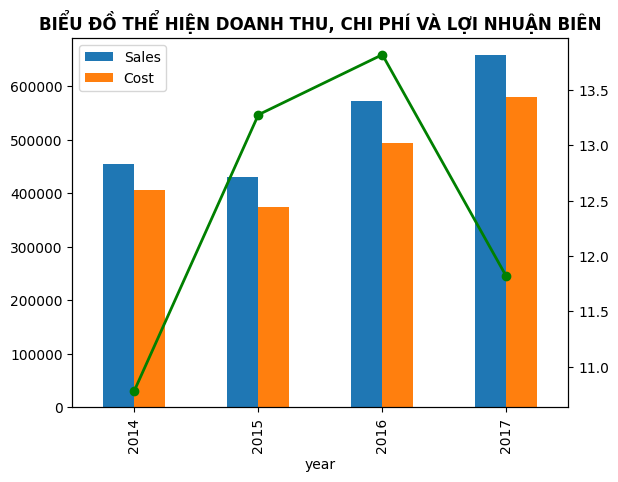

In [46]:
fig = plt.figure()
ax = df_gb[['Sales','Cost']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(df_gb[['Margin']].values, linestyle='-', marker='o', linewidth=2.0,color='g')
plt.title("BIỂU ĐỒ THỂ HIỆN DOANH THU, CHI PHÍ VÀ LỢI NHUẬN BIÊN", fontsize=12, fontweight='bold')

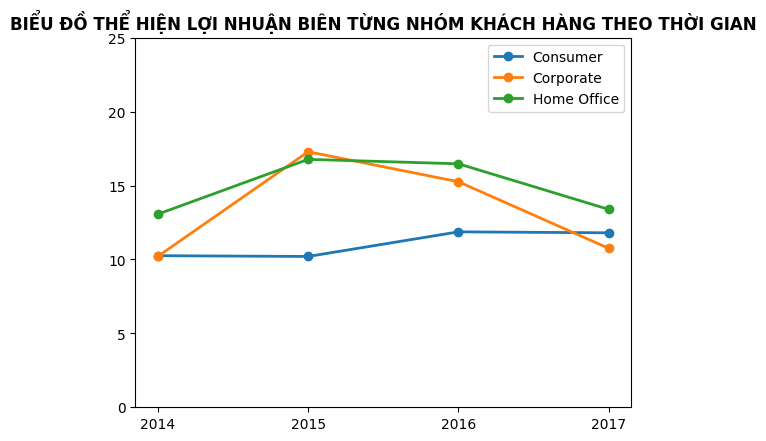

In [47]:
df_gb = df.groupby(['year','Segment']).agg({'Sales':'sum','Profit':'sum'}).reset_index()
df_gb['Cost'] = [i-j for i,j in zip(df_gb['Sales'],df_gb['Profit'])]
df_gb['Margin'] = [j/i*100 for i,j in zip(df_gb['Sales'],df_gb['Profit'])]

for i in df_gb['Segment'].unique():
  df_i = df_gb[df_gb['Segment']==i]
  plt.plot(df_i['year'],df_i['Margin'],label=i, linestyle='-', marker='o', linewidth=2.0)
plt.legend()
plt.ylim([0,25])
plt.title("BIỂU ĐỒ THỂ HIỆN LỢI NHUẬN BIÊN TỪNG NHÓM KHÁCH HÀNG THEO THỜI GIAN", fontsize=12, fontweight='bold')
plt.show()

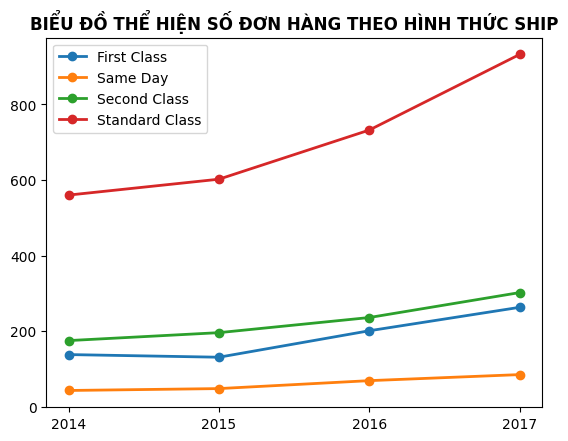

In [48]:
df_gb = df.groupby(['year','Ship_Mode']).agg({'Sales':'sum','Profit':'sum','Order_ID':'nunique'}).reset_index()
df_gb['Cost'] = [i-j for i,j in zip(df_gb['Sales'],df_gb['Profit'])]
df_gb['Margin'] = [j/i*100 for i,j in zip(df_gb['Sales'],df_gb['Profit'])]

for i in df_gb['Ship_Mode'].unique():
  df_i = df_gb[df_gb['Ship_Mode']==i]
  plt.plot(df_i['year'],df_i['Order_ID'],label=i, linestyle='-', marker='o', linewidth=2.0)
plt.legend()
plt.title("BIỂU ĐỒ THỂ HIỆN SỐ ĐƠN HÀNG THEO HÌNH THỨC SHIP", fontsize=12, fontweight='bold')
plt.show()

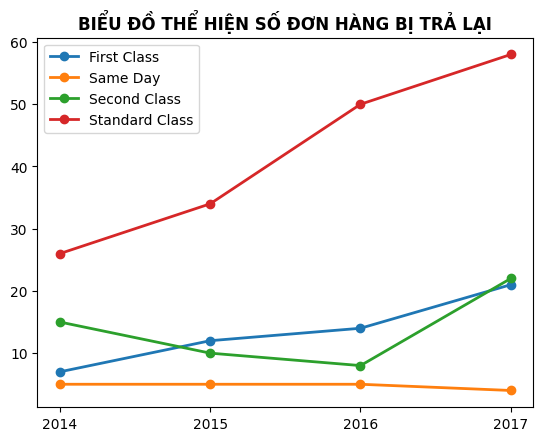

In [49]:
df_gb = df_return.groupby(['year','Ship_Mode']).agg({'Sales':'sum','Profit':'sum','Order_ID':'nunique'}).reset_index()
df_gb['Cost'] = [i-j for i,j in zip(df_gb['Sales'],df_gb['Profit'])]
df_gb['Margin'] = [j/i*100 for i,j in zip(df_gb['Sales'],df_gb['Profit'])]

for i in df_gb['Ship_Mode'].unique():
  df_i = df_gb[df_gb['Ship_Mode']==i]
  plt.plot(df_i['year'],df_i['Order_ID'],label=i, linestyle='-', marker='o', linewidth=2.0)
plt.legend()
plt.title("BIỂU ĐỒ THỂ HIỆN SỐ ĐƠN HÀNG BỊ TRẢ LẠI", fontsize=12, fontweight='bold')
plt.show()

<ipython-input-50-2099782d4ad6>:30: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



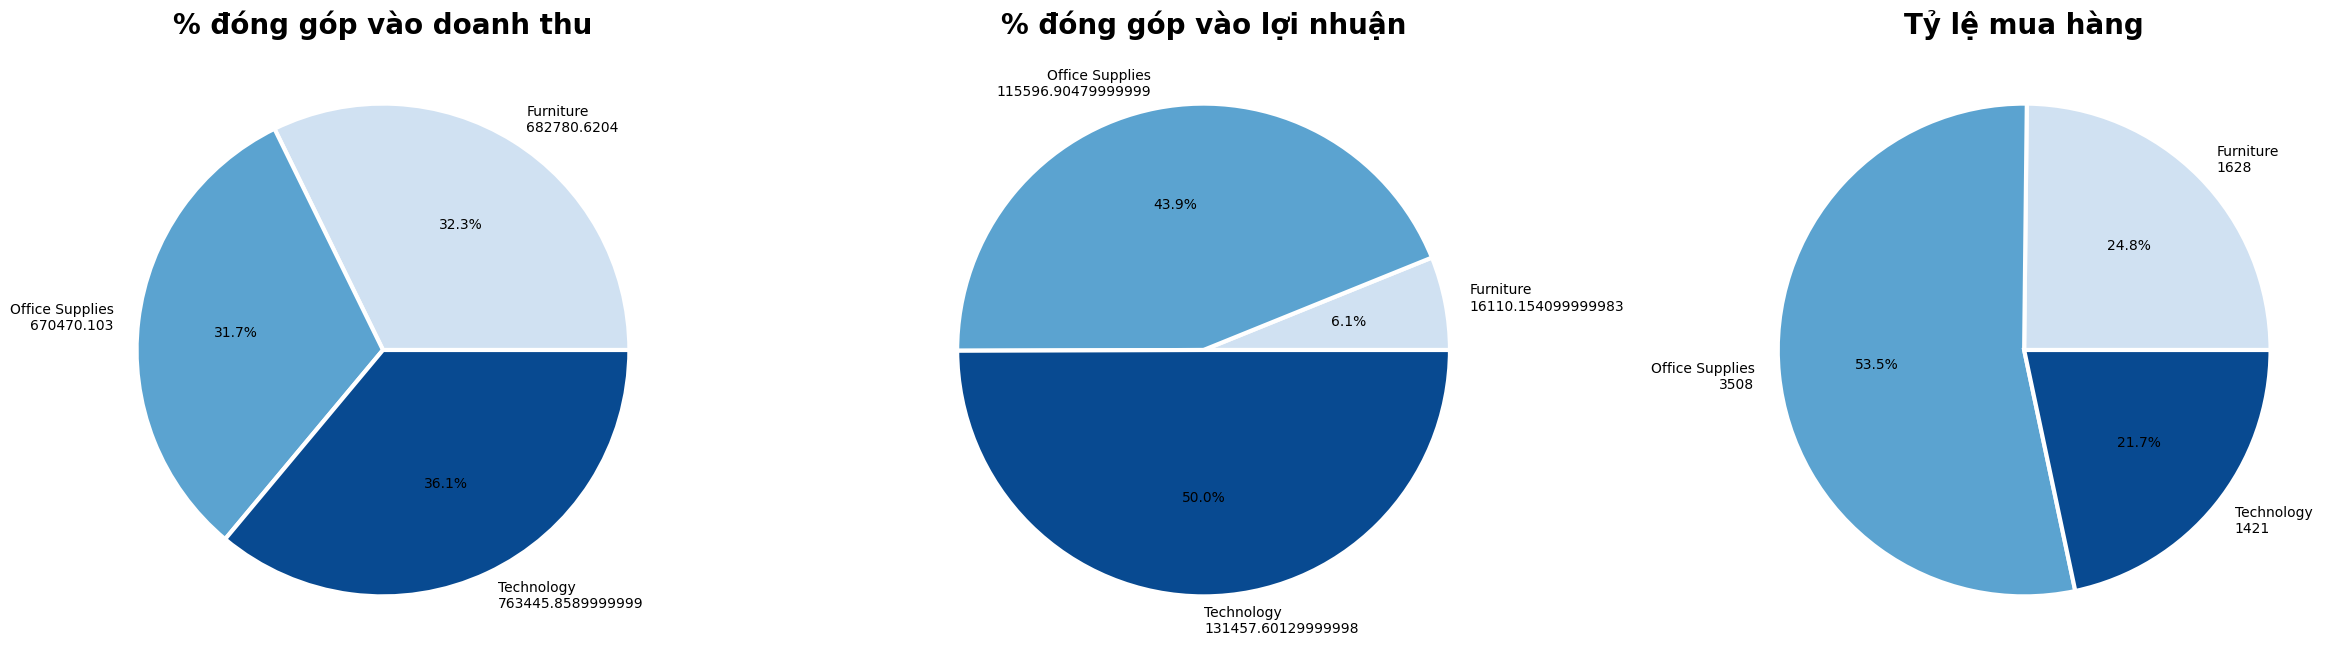

In [50]:
cat = df['Category'].unique()
true_revenue = df['Sales'].sum()
true_profit = df['Profit'].sum()
no_order = df['Order_ID'].nunique()
revenue_cat = []
profit_cat = []
order_cat = []
return_cat = []
plot_title = ['Doanh thu', 'Lợi nhuận','Số đơn','Số đơn bị trả lại']
plot_order = [revenue_cat,profit_cat,order_cat,return_cat]
for i in cat:
  df_i = df[df['Category']==i]
  revenue_cat.append(df_i[df_i['Returned']!='Yes']['Sales'].sum())
  profit_cat.append(df_i[df_i['Returned']!='Yes']['Profit'].sum())
  return_cat.append(df_i[df_i['Returned']!='Yes']['Order_ID'].nunique())
  order_cat.append(df_i['Order_ID'].nunique())

pot_cat_rev = []
pot_cat_pro = []
pot_cat_order = []
plot_order = [pot_cat_rev,pot_cat_pro,pot_cat_order]

colors = ['r', 'g', 'b']
plot_title = ['% đóng góp vào doanh thu','% đóng góp vào lợi nhuận','Tỷ lệ mua hàng']
for i in range(0,len(cat)):
   pot_cat_rev.append(revenue_cat[i]/true_revenue)
   pot_cat_pro.append(profit_cat[i]/true_profit)
   pot_cat_order.append(order_cat[i]/(no_order))

colormap = cm.get_cmap('Blues')
colors = [colormap(x) for x in np.linspace(0.2, 0.9, len(cat))]

fig, ax = plt.subplots(1, (len(plot_order)),figsize=(30, 8))
new_cat = [[i+'\n'+str(j) for i,j in zip(cat, revenue_cat)],[i+'\n'+str(j) for i,j in zip(cat, profit_cat)],[i+'\n'+str(j) for i,j in zip(cat, order_cat)]]
for i in range(0,len(plot_order)):
  ax[i].pie(plot_order[i], labels = new_cat[i], colors = colors, autopct='%1.1f%%', 
            wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
  ax[i].set_title(plot_title[i], fontsize=20, weight='bold')

plt.savefig('4.png')

In [51]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [52]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal_Code',1, inplace = True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

<ipython-input-52-5ffae09ce9e7>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-52-5ffae09ce9e7>:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



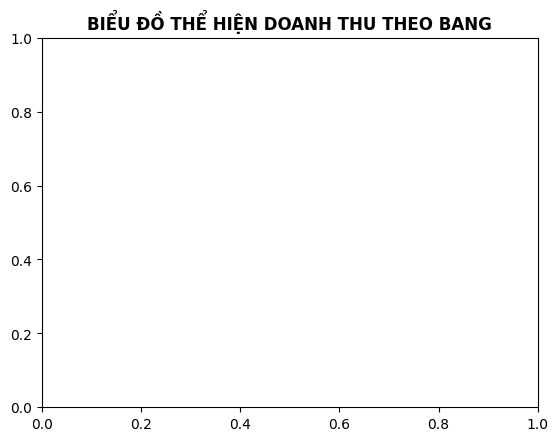

In [53]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)
plt.title("BIỂU ĐỒ THỂ HIỆN DOANH THU THEO BANG", fontsize=12, fontweight='bold')

fig.show();

In [54]:
df['Value'] = df['Quantity']*df['Sales']*(1-df['Discount'])
rfm = df.groupby('Customer_Name').agg({'Order_Date':['min','max'],'Order_ID':'nunique','Value':'sum'}).reset_index()
rfm.columns = ['Customer Name','First Order Date', 'Last Order Date','Frequency','Monetary']
rfm['Last Order Date'] = pd.to_datetime(rfm['Last Order Date'],'%Y-%m-%d')
max_date = max(rfm['Last Order Date'])
rfm['Recency'] = [(max_date - x).days for x in rfm['Last Order Date']]
rfm.head()

,Customer Name,First Order Date,Last Order Date,Frequency,Monetary,Recency
0,Aaron Bergman,2014-02-18,2016-11-10,3,1969.6880,415
1,Aaron Hawkins,2014-04-22,2017-12-18,7,9849.8576,12
2,Aaron Smayling,2014-07-27,2017-10-03,7,5760.7664,88
3,Adam Bellavance,2015-09-18,2017-11-06,8,31709.4200,54
4,Adam Hart,2014-11-16,2017-11-26,10,7926.3001,34


Ks =  [2, 3, 4, 5, 6, 7, 8, 9, 10]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

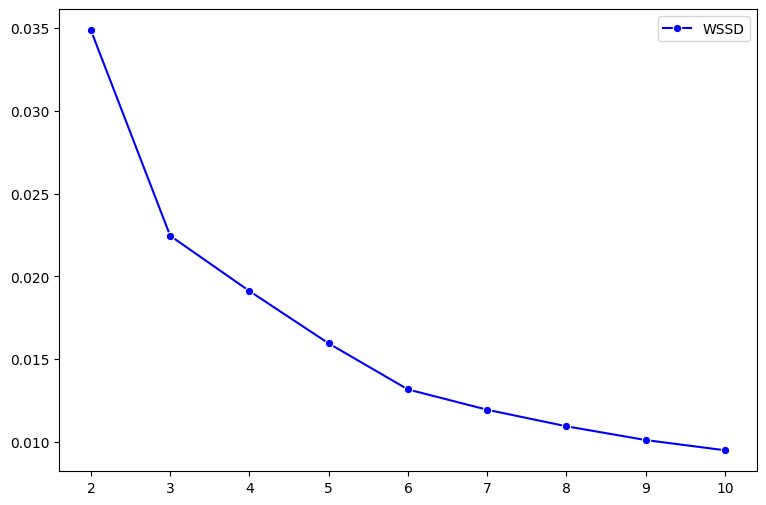

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

KS = list(range(2, 11))
print('Ks = ', KS)

train = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

wssd = [] # Within-cluster sum of square distace
silhouette = []

for k in KS:
    model = KMeans(n_clusters=k).fit(train_scaled)

    # Calculate wssd
    wssd.append(model.inertia_ / len(train))

    # Calculate Silhoute
    cluster_labels = model.predict(train_scaled)
    silhouette.append(silhouette_score(train_scaled, cluster_labels))

plt.figure(figsize=(9, 6))
ax1 = sns.lineplot(
    x=KS, y=wssd, color='blue',
    marker='o',
    label='WSSD', legend=None
)

# Remove the grid
ax1.grid(False)

# Merge the legend
h1, l1 = ax1.get_legend_handles_labels()
ax1.legend(h1, l1, loc=0)

In [56]:
k = 6
model = KMeans(n_clusters=k).fit(train_scaled)
cluster_labels = model.predict(train_scaled)
rfm['cluster'] = cluster_labels
rfm.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Customer Name,First Order Date,Last Order Date,Frequency,Monetary,Recency,cluster
0,Aaron Bergman,2014-02-18,2016-11-10,3,1969.6880,415,0
1,Aaron Hawkins,2014-04-22,2017-12-18,7,9849.8576,12,1
2,Aaron Smayling,2014-07-27,2017-10-03,7,5760.7664,88,1
3,Adam Bellavance,2015-09-18,2017-11-06,8,31709.4200,54,5
4,Adam Hart,2014-11-16,2017-11-26,10,7926.3001,34,3


In [57]:
import plotly.express as px

fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary',
              color='cluster')
fig.show()

In [58]:
rfm_scaled = rfm.copy()
rfm_scaled[['recency', 'frequency', 'monetary']] = train_scaled

In [59]:
rfm_gb = rfm_scaled.groupby('cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})
rfm_gb

,Recency,Frequency,Monetary
cluster,,,
0,414.423077,4.259615,6570.074301
1,70.600000,6.896000,10542.161986
2,86.658120,4.076923,7026.287431
3,74.543860,9.973684,14836.980935
4,804.159091,2.795455,5626.982768
5,125.866667,7.377778,49597.947088


In [66]:
rename = {0:'Hibernating',1:'Champion',2:'OK',3:'Potential',4:'Churn',5:'Loyal'}
rfm_gb = rfm_scaled.groupby('cluster').agg({'Frequency':'sum','Monetary':'sum'}).reset_index()
rfm_gb['cluster_name'] = [rename[i] for i in rfm_gb['cluster']]

In [67]:
rfm_gb.index = rfm_gb['cluster_name']
rfm_gb['Margin'] = [i/rfm_gb['Monetary'].sum() for i in rfm_gb['Monetary']]

In [68]:
rfm_gb

,cluster,Frequency,Monetary,cluster_name,Margin
cluster_name,,,,,
Hibernating,0,443,6.832877e+05,Hibernating,0.074808
Champion,1,1724,2.635540e+06,Champion,0.288545
OK,2,954,1.644151e+06,OK,0.180006
Potential,3,1137,1.691416e+06,Potential,0.185180
Churn,4,123,2.475872e+05,Churn,0.027106
Loyal,5,332,2.231908e+06,Loyal,0.244355


Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN DOANH THU VÀ LỢI NHUẬN BIÊN THEO TỆP KHÁCH HÀNG')

<Figure size 2000x1000 with 0 Axes>

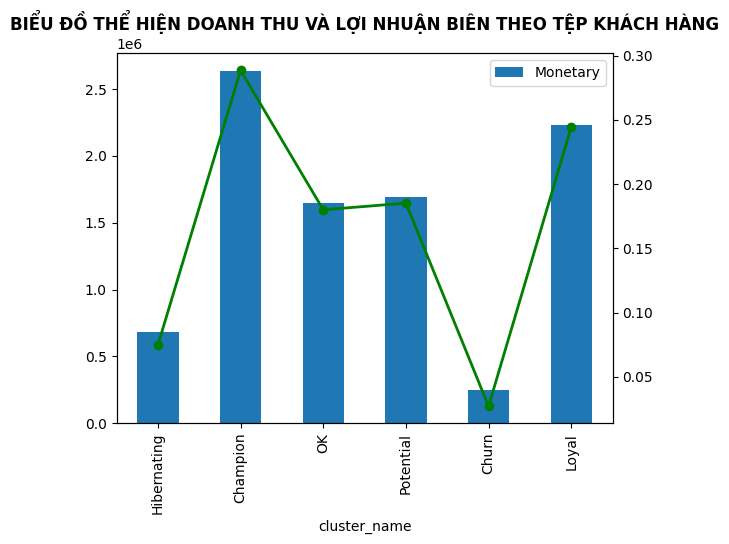

In [69]:
fig = plt.figure(figsize=(20,10))
ax = rfm_gb[['Monetary']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(rfm_gb[['Margin']].values, linestyle='-', marker='o', linewidth=2.0,color='g')
plt.title("BIỂU ĐỒ THỂ HIỆN DOANH THU VÀ LỢI NHUẬN BIÊN THEO TỆP KHÁCH HÀNG", fontsize=12, fontweight='bold')


In [70]:
rfm['cluster_name'] = [rename[i] for i in rfm['cluster']]

In [71]:
rfm.to_csv('/content/segment.csv')